In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

Load the pre-trained face detection model. OpenCV provides a set of pre-trained **Haar Cascade classifiers** for detecting various objects, including faces. **cv2.CascadeClassifier** is a class that represents the Haar Cascade classifier. The **cv2.data.haarcascades** is a path to the directory containing the pre-trained models. **haarcascade_frontalface_default.xml** is the file containing the pre-trained face detection model.

In [3]:
# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


Load the input image `001_fe3347c0.jpg` can be image of your choice using OpenCV's ``imread()`` function. It then converts the image to grayscale using OpenCV's `cvtColor()` function. The grayscale image is required for the face detection algorithm.

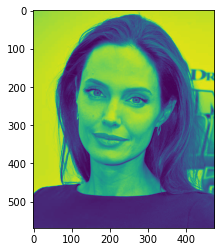

In [4]:
# Load the image and convert it to grayscale
img = cv2.imread('001_fe3347c0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#show the image 
plt.imshow(gray)

The line below detects faces in the grayscale image using the detectMultiScale() method of the CascadeClassifier class. The detectMultiScale() method takes the following arguments:

`gray`: the grayscale image
    
`scaleFactor`: parameter specifying how much the image size is reduced at each image scale. A value of **1.3** means the image is reduced by **30%** at each scale.
    
`minNeighbors`: parameter specifying how many neighbors each candidate rectangle should have to retain it. A higher value results in fewer detections but with higher confidence.
    
The `detectMultiScale()` method returns a list of rectangles where faces are detected. Each rectangle is represented as a tuple of four integers (x,y,w,h) representing the top-left corner coordinates (x,y) of the rectangle and its width w and height h.

In [5]:
# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)



Let's create a loop that draws rectangles around the detected faces in the original image. The cv2.rectangle() function takes the following arguments:

`img`: the original image.
    
`(x,y)`: the top-left corner coordinates of the rectangle.
    
`(x+w,y+h)`: the bottom-right corner coordinates of the rectangle.
    
`(255,0,0)`: the color of the rectangle in RGB format. (255,0,0) represents blue.
    
`5`: the thickness of the rectangle border in pixels.

In [6]:
# Draw rectangles around the detected faces
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)



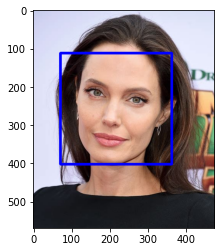

In [7]:
# Display the image with the detected faces
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
# Save the detected image by name
cv2.imwrite('detected_image.jpg', img)


True

In [9]:
detected_image=cv2.imread("detected_image.jpg", 1)

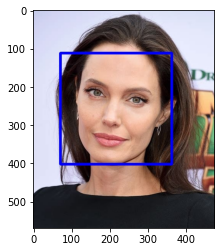

In [10]:
gray_channels_reversed = detected_image[:, :, ::-1]
plt.imshow(gray_channels_reversed)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from scipy.spatial.distance import cosine

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the pre-trained FaceNet model
facenet_model = load_model('facenet_keras.h5')

# Load the detected image of Joseph
img1 = load_img('detected_image.jpg', target_size=(160, 160))
img1 = img_to_array(img1)
img1 = img1.astype('float32') / 255.0
img1 = np.expand_dims(img1, axis=0)

# Load another image to compare with Joseph's image
img2 = load_img('test_image.jpg', target_size=(160, 160))
img2 = img_to_array(img2)
img2 = img2.astype('float32') / 255.0
img2 = np.expand_dims(img2, axis=0)

# Extract the features of the two images using FaceNet
features1 = facenet_model.predict(img1)
features2 = facenet_model.predict(img2)

# Compute the cosine similarity between the two feature vectors
score = cosine(features1, features2)

# Check if the score is below a certain threshold (e.g. 0.5) to determine if the two faces match
if score < 0.5:
    print("The model recognized Joseph in both images.")
else:
    print("The model did not recognize Joseph in one or both of the images.")


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
from scipy.spatial.distance import cosine

# Load the face detection model and the facial landmark detector
face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Load the detected image of Joseph
img1 = cv2.imread('detected_image.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Detect the face and facial landmarks of Joseph's image
rects1 = face_detector(gray1, 1)
landmarks1 = landmark_detector(gray1, rects1[0])
landmarks1 = face_utils.shape_to_np(landmarks1)

# Load another image to compare with Joseph's image
img2 = cv2.imread('test_image.jpg')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect the face and facial landmarks of the second image
rects2 = face_detector(gray2, 1)
landmarks2 = landmark_detector(gray2, rects2[0])
landmarks2 = face_utils.shape_to_np(landmarks2)

# Extract the features of the two images by computing the Euclidean distances between facial landmarks
features1 = np.zeros((68, 1))
features2 = np.zeros((68, 1))

for i in range(68):
    features1[i] = np.linalg.norm(landmarks1[i] - landmarks1[0])
    features2[i] = np.linalg.norm(landmarks2[i] - landmarks2[0])

# Compute the cosine similarity between the two feature vectors
score = cosine(features1, features2)

# Check if the score is below a certain threshold (e.g. 0.5) to determine if the two faces match
if score < 0.5:
    print("The model recognized Joseph in both images.")
else:
    print("The model did not recognize Joseph in one or both of the images.")


In [1]:
#!pip install dlib
